In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [19]:

def euclidean_distance(p1, p2):

    return np.sqrt(np.sum((p1 - p2)**2))

def region_query(X, point_idx, eps):

    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, minPts, visited):

    queue = deque()
    queue.append(point_idx)
    labels[point_idx] = cluster_id

    while queue:
        current_point = queue.popleft()
        neighbors = region_query(X, current_point, eps)

        if len(neighbors) >= minPts:
            for n_idx in neighbors:
                if not visited[n_idx]:
                    visited[n_idx] = True
                    queue.append(n_idx)
                if labels[n_idx] == 0:
                    labels[n_idx] = cluster_id
                if labels[n_idx] == -1:
                    labels[n_idx] = cluster_id
    return labels

def dbscan(X, eps, minPts):

    m = len(X)
    labels = np.full(m, -1)
    visited = np.zeros(m, dtype=bool)
    cluster_id = 0

    for i in range(m):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = region_query(X, i, eps)

        if len(neighbors) < minPts:
            labels[i] = 0
        else:
            cluster_id += 1
            labels = expand_cluster(X, labels, i, cluster_id, eps, minPts, visited)

    return labels


In [20]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")

print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
print("Validation Data Shape:", val_df.shape)


X_train = train_df.values
X_test = test_df.values
X_val = val_df.values


Training Data Shape: (419, 2)
Testing Data Shape: (89, 2)
Validation Data Shape: (89, 2)


In [21]:
eps = 3
minPts = 2

print("\n=== Running DBSCAN on Training Data ===")
labels_train = dbscan(X_train, eps, minPts)
print("Cluster Assignments (Train):", *labels_train)

print("\n=== Running DBSCAN on Testing Data ===")
labels_test = dbscan(X_test, eps, minPts)
print("Cluster Assignments (Test):", *labels_test)

print("\n=== Running DBSCAN on Validation Data ===")
labels_val = dbscan(X_val, eps, minPts)
print("Cluster Assignments (Validation):", *labels_val)



=== Running DBSCAN on Training Data ===
Cluster Assignments (Train): 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

=== Running DBSCAN on Testing Data ===
Cluster Assignments (Test): 1 1 1 1 1 2 1 2 1 2 2 2 

In [22]:
def noise_ratio(labels):
    return np.sum(labels == 0) / len(labels)

print("\nNoise Ratio (Train):", round(noise_ratio(labels_train), 2))
print("Noise Ratio (Test):", round(noise_ratio(labels_test), 2))
print("Noise Ratio (Validation):", round(noise_ratio(labels_val), 2))



Noise Ratio (Train): 0.0
Noise Ratio (Test): 0.0
Noise Ratio (Validation): 0.0


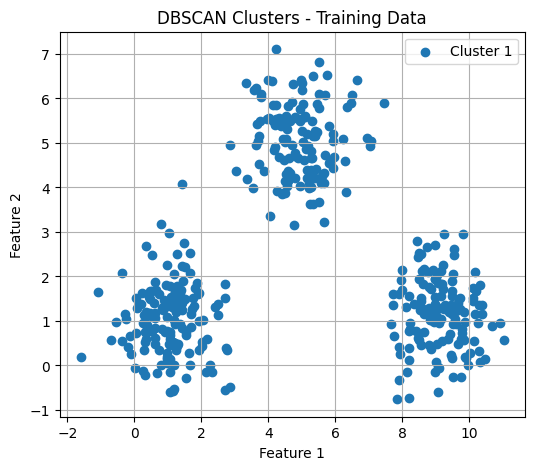

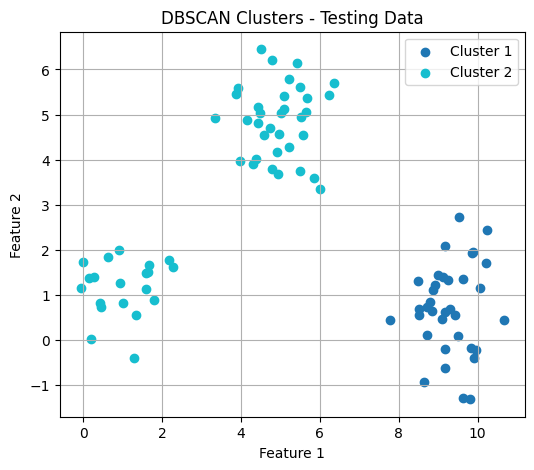

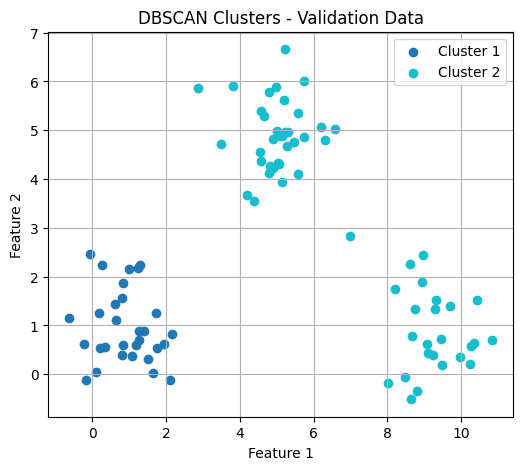

In [23]:
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(6,5))
    unique_labels = set(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        if k == 0:
            plt.scatter(X[labels == k, 0], X[labels == k, 1], c='k', marker='x', s=100, label='Noise')
        else:
            plt.scatter(X[labels == k, 0], X[labels == k, 1], c=[col], label=f'Cluster {k}')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_clusters(X_train, labels_train, "DBSCAN Clusters - Training Data")
visualize_clusters(X_test, labels_test, "DBSCAN Clusters - Testing Data")
visualize_clusters(X_val, labels_val, "DBSCAN Clusters - Validation Data")